In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
dataOrig = pd.read_csv("feature_extraction/dataOrig.csv",usecols=lambda column: column != 'filename')

In [3]:
dataOrig.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,-0.841709,2.132198,1.083206,-0.077104,0.648073,-1.484534,3.725629,4.553656,4.274244,pop
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,2.602134,4.048971,2.384604,1.780818,-2.392593,-1.346176,-2.879179,-0.849864,-2.598134,pop
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,0.874806,-1.936897,-2.783130,-2.666644,-3.311479,1.708261,-0.152766,4.846820,2.906235,pop
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,-0.844541,2.099680,1.122588,0.006671,0.748260,-1.474304,3.672843,4.469373,4.198666,pop
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.441958,-1.084060,-3.450706,-2.475977,-3.302751,-2.228499,-2.649557,-2.744086,0.305748,pop


In [4]:
mappingGenresToIntegers = {
    'pop': 0,
    'metal': 1,
    'disco': 2,
    'blues': 3,
    'reggae': 4,
    'classical': 5,
    'rock': 6,
    'hiphop': 7,
    'country': 8,
    'jazz': 9
}


dataOrig['genre'] = dataOrig['genre'].map(mappingGenresToIntegers)
dataOrig.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,-0.841709,2.132198,1.083206,-0.077104,0.648073,-1.484534,3.725629,4.553656,4.274244,0
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,2.602134,4.048971,2.384604,1.780818,-2.392593,-1.346176,-2.879179,-0.849864,-2.598134,0
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,0.874806,-1.936897,-2.783130,-2.666644,-3.311479,1.708261,-0.152766,4.846820,2.906235,0
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,-0.844541,2.099680,1.122588,0.006671,0.748260,-1.474304,3.672843,4.469373,4.198666,0
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.441958,-1.084060,-3.450706,-2.475977,-3.302751,-2.228499,-2.649557,-2.744086,0.305748,0


In [5]:
X = dataOrig.iloc[:, :-1]
y = dataOrig.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# CV Round 1 - only looking at n_estimators

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146
151
156
161
166
171
176
181
186
191
196


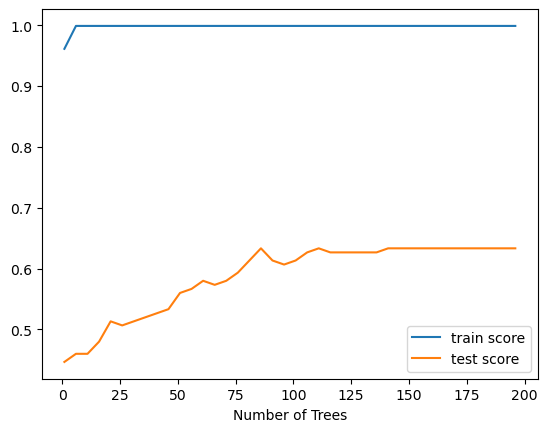

In [10]:
train_scores = np.zeros(0)
test_scores = np.zeros(0)

for i in range(1,201, 5):
    print(i)
    random_forest = GradientBoostingClassifier(n_estimators=i,max_depth=10,random_state=42)
    random_forest.fit(X_train,y_train)
    train_scores = np.hstack([train_scores, random_forest.score(X_train,y_train)])
    test_scores = np.hstack([test_scores, random_forest.score(X_test,y_test)])
    
ax = sns.lineplot(x=range(1,201, 5),y=train_scores,label="train score")
sns.lineplot(x=range(1,201, 5),y=test_scores,label="test score")
plt.xlabel('Number of Trees')
plt.legend()
plt.show()

Pretty much the same for 75 onwards. will keep that in mind for next round of gridsearchcv

# GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [75, 100, 125, 150, 175],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [1, 10, 20, 30],
    'min_samples_split': [2, 3, 4]
}

gbc = GradientBoostingClassifier()

GBCGridSearch = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=3, scoring='accuracy', verbose=10)

GBCGridSearch.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV 1/3; 1/180] START learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=75
[CV 1/3; 1/180] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=75;, score=0.521 total time=   1.7s
[CV 2/3; 1/180] START learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=75
[CV 2/3; 1/180] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=75;, score=0.548 total time=   1.8s
[CV 3/3; 1/180] START learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=75
[CV 3/3; 1/180] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=75;, score=0.548 total time=   1.8s
[CV 1/3; 2/180] START learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=100
[CV 1/3; 2/180] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=100;, score=0.525 total time=   2.5s
[CV 2/3; 2/180] START learning_rate=0.1, max_depth=1, min_samples_split=2, n_estima

[CV 3/3; 13/180] END learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=125;, score=0.580 total time=   3.1s
[CV 1/3; 14/180] START learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=150
[CV 1/3; 14/180] END learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=150;, score=0.528 total time=   3.8s
[CV 2/3; 14/180] START learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=150
[CV 2/3; 14/180] END learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=150;, score=0.551 total time=   4.2s
[CV 3/3; 14/180] START learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=150
[CV 3/3; 14/180] END learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=150;, score=0.587 total time=   3.6s
[CV 1/3; 15/180] START learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=175
[CV 1/3; 15/180] END learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=175;, score=0.532 total time=   4.1s
[CV 2/3;

[CV 2/3; 26/180] END learning_rate=0.1, max_depth=10, min_samples_split=4, n_estimators=75;, score=0.505 total time=  13.7s
[CV 3/3; 26/180] START learning_rate=0.1, max_depth=10, min_samples_split=4, n_estimators=75
[CV 3/3; 26/180] END learning_rate=0.1, max_depth=10, min_samples_split=4, n_estimators=75;, score=0.481 total time=  14.8s
[CV 1/3; 27/180] START learning_rate=0.1, max_depth=10, min_samples_split=4, n_estimators=100
[CV 1/3; 27/180] END learning_rate=0.1, max_depth=10, min_samples_split=4, n_estimators=100;, score=0.525 total time=  17.8s
[CV 2/3; 27/180] START learning_rate=0.1, max_depth=10, min_samples_split=4, n_estimators=100
[CV 2/3; 27/180] END learning_rate=0.1, max_depth=10, min_samples_split=4, n_estimators=100;, score=0.512 total time=  17.5s
[CV 3/3; 27/180] START learning_rate=0.1, max_depth=10, min_samples_split=4, n_estimators=100
[CV 3/3; 27/180] END learning_rate=0.1, max_depth=10, min_samples_split=4, n_estimators=100;, score=0.498 total time=15.9min
[C

[CV 1/3; 39/180] END learning_rate=0.1, max_depth=20, min_samples_split=3, n_estimators=150;, score=0.500 total time=  31.2s
[CV 2/3; 39/180] START learning_rate=0.1, max_depth=20, min_samples_split=3, n_estimators=150
[CV 2/3; 39/180] END learning_rate=0.1, max_depth=20, min_samples_split=3, n_estimators=150;, score=0.495 total time=  29.2s
[CV 3/3; 39/180] START learning_rate=0.1, max_depth=20, min_samples_split=3, n_estimators=150
[CV 3/3; 39/180] END learning_rate=0.1, max_depth=20, min_samples_split=3, n_estimators=150;, score=0.502 total time=  27.0s
[CV 1/3; 40/180] START learning_rate=0.1, max_depth=20, min_samples_split=3, n_estimators=175
[CV 1/3; 40/180] END learning_rate=0.1, max_depth=20, min_samples_split=3, n_estimators=175;, score=0.514 total time=  29.2s
[CV 2/3; 40/180] START learning_rate=0.1, max_depth=20, min_samples_split=3, n_estimators=175
[CV 2/3; 40/180] END learning_rate=0.1, max_depth=20, min_samples_split=3, n_estimators=175;, score=0.488 total time=  26.8s

[CV 3/3; 51/180] END learning_rate=0.1, max_depth=30, min_samples_split=3, n_estimators=75;, score=0.470 total time=  28.4s
[CV 1/3; 52/180] START learning_rate=0.1, max_depth=30, min_samples_split=3, n_estimators=100
[CV 1/3; 52/180] END learning_rate=0.1, max_depth=30, min_samples_split=3, n_estimators=100;, score=0.500 total time=  30.1s
[CV 2/3; 52/180] START learning_rate=0.1, max_depth=30, min_samples_split=3, n_estimators=100
[CV 2/3; 52/180] END learning_rate=0.1, max_depth=30, min_samples_split=3, n_estimators=100;, score=0.484 total time=  30.3s
[CV 3/3; 52/180] START learning_rate=0.1, max_depth=30, min_samples_split=3, n_estimators=100
[CV 3/3; 52/180] END learning_rate=0.1, max_depth=30, min_samples_split=3, n_estimators=100;, score=0.495 total time=  29.6s
[CV 1/3; 53/180] START learning_rate=0.1, max_depth=30, min_samples_split=3, n_estimators=125
[CV 1/3; 53/180] END learning_rate=0.1, max_depth=30, min_samples_split=3, n_estimators=125;, score=0.496 total time=  32.2s


[CV 2/3; 64/180] END learning_rate=0.05, max_depth=1, min_samples_split=2, n_estimators=150;, score=0.537 total time=   3.4s
[CV 3/3; 64/180] START learning_rate=0.05, max_depth=1, min_samples_split=2, n_estimators=150
[CV 3/3; 64/180] END learning_rate=0.05, max_depth=1, min_samples_split=2, n_estimators=150;, score=0.541 total time=   3.4s
[CV 1/3; 65/180] START learning_rate=0.05, max_depth=1, min_samples_split=2, n_estimators=175
[CV 1/3; 65/180] END learning_rate=0.05, max_depth=1, min_samples_split=2, n_estimators=175;, score=0.521 total time=   5.1s
[CV 2/3; 65/180] START learning_rate=0.05, max_depth=1, min_samples_split=2, n_estimators=175
[CV 2/3; 65/180] END learning_rate=0.05, max_depth=1, min_samples_split=2, n_estimators=175;, score=0.541 total time=   4.1s
[CV 3/3; 65/180] START learning_rate=0.05, max_depth=1, min_samples_split=2, n_estimators=175
[CV 3/3; 65/180] END learning_rate=0.05, max_depth=1, min_samples_split=2, n_estimators=175;, score=0.565 total time=   4.3s

[CV 1/3; 77/180] END learning_rate=0.05, max_depth=10, min_samples_split=2, n_estimators=100;, score=0.461 total time=  21.1s
[CV 2/3; 77/180] START learning_rate=0.05, max_depth=10, min_samples_split=2, n_estimators=100
[CV 2/3; 77/180] END learning_rate=0.05, max_depth=10, min_samples_split=2, n_estimators=100;, score=0.481 total time=  19.7s
[CV 3/3; 77/180] START learning_rate=0.05, max_depth=10, min_samples_split=2, n_estimators=100
[CV 3/3; 77/180] END learning_rate=0.05, max_depth=10, min_samples_split=2, n_estimators=100;, score=0.473 total time=  19.8s
[CV 1/3; 78/180] START learning_rate=0.05, max_depth=10, min_samples_split=2, n_estimators=125
[CV 1/3; 78/180] END learning_rate=0.05, max_depth=10, min_samples_split=2, n_estimators=125;, score=0.486 total time=  25.6s
[CV 2/3; 78/180] START learning_rate=0.05, max_depth=10, min_samples_split=2, n_estimators=125
[CV 2/3; 78/180] END learning_rate=0.05, max_depth=10, min_samples_split=2, n_estimators=125;, score=0.488 total tim

In [ ]:
pd_res = pd.concat([pd.DataFrame(GBCGridSearch.cv_results_["params"]),pd.DataFrame(GBCGridSearch.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
pd_res = pd_res.sort_values('Accuracy', ascending=False)
pd_res.head(5)

The accuracy in the table above was training accuracy. Below, I'll calculate test accuracy:

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

print("Best params: ", GBCGridSearch.best_params_)

bestGBC = GBCGridSearch.best_estimator_

bestGBCPreds = bestGBC.predict(X_test)

print("Precision : ", accuracy_score(y_test, bestGBCPreds))

print("Recall : ", recall_score(y_test, bestGBCPreds, average = 'macro'))

print("F1-Score : ", f1_score(y_test, bestGBCPreds, average = 'macro'))